In [372]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [373]:
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [374]:
# Noisy variables are removed from features
application_df=application_df.drop(columns=["EIN","NAME"])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [375]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [376]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [377]:
# Binning for  APPLICATION_TYPE column

type_count=application_df.APPLICATION_TYPE.value_counts()
# Determine which values to replace if counts are less than ...?
replace_application = list(type_count[type_count < 200].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [378]:
# Binning for CLASSIFICATION column
classify_count=application_df.CLASSIFICATION.value_counts()
# Determine which values to replace if counts are less than ..?
replace_class=list(classify_count[classify_count<1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other1")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000     17326
C2000      6074
C1200      4837
Other1     2261
C3000      1918
C2100      1883
Name: CLASSIFICATION, dtype: int64

In [379]:
# Generate our categorical variable lists
application_cat=application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [380]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df=pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [381]:
# Merge one-hot encoded features and drop the originals
application_df=application_df.merge(encode_df,left_index=True,right_index=True)
application_df=application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [382]:
# Split our preprocessed data into our features and target arrays
y=application_df["IS_SUCCESSFUL"].values
X=application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=78)

In [383]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [384]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_feature=len(X_train[0])
hidden_node_layer1=40
hidden_node_layer2=30
hidden_node_layer3=20
nn = tf.keras.models.Sequential()
# First hidden layer
nn.add(tf.keras.layers.Dense(units= hidden_node_layer1,input_dim=number_input_feature,activation="relu"))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node_layer2,activation="relu"))
# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node_layer3,activation="tanh"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 40)                1760      
_________________________________________________________________
dense_81 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_82 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 21        
Total params: 3,631
Trainable params: 3,631
Non-trainable params: 0
_________________________________________________________________


In [385]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints",exist_ok=True)
checkpoint_path="checkpoints/weights.{epoch:02d}.hdf5"

In [386]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)



In [387]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=300,callbacks=[cp_callback])

Epoch 1/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5704 - accuracy: 0.7207
Epoch 2/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5551 - accuracy: 0.7296
Epoch 3/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5519 - accuracy: 0.7318
Epoch 4/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5510 - accuracy: 0.7311
Epoch 5/300
763/804 [===========================>..] - ETA: 0s - loss: 0.5500 - accuracy: 0.7322
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5495 - accuracy: 0.7330
Epoch 6/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5489 - accuracy: 0.7331
Epoch 7/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5485 - accuracy: 0.7342: 0s - loss: 0.5483 - accuracy: 0.
Epoch 8/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5480 - accuracy: 0.7332
Epoch 9/300
804/

804/804 [==============================] - 1s 2ms/step - loss: 0.5373 - accuracy: 0.7401
Epoch 63/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5375 - accuracy: 0.7402
Epoch 64/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5380 - accuracy: 0.7401
Epoch 65/300
520/804 [==================>...........] - ETA: 0s - loss: 0.5372 - accuracy: 0.7407
Epoch 00065: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5375 - accuracy: 0.7405: 0s - loss: 0.5365 - 
Epoch 66/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5378 - accuracy: 0.7401
Epoch 67/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5375 - accuracy: 0.7404
Epoch 68/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5371 - accuracy: 0.7408
Epoch 69/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5373 - accuracy: 0.7401
Epoch 70/300
524/804 [===========

285/804 [=========>....................] - ETA: 1s - loss: 0.5334 - accuracy: 0.7433
Epoch 00125: saving model to checkpoints\weights.125.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5348 - accuracy: 0.7412
Epoch 126/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5345 - accuracy: 0.7407
Epoch 127/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5351 - accuracy: 0.7413
Epoch 128/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5344 - accuracy: 0.7416
Epoch 129/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5349 - accuracy: 0.7416
Epoch 130/300
265/804 [========>.....................] - ETA: 1s - loss: 0.5304 - accuracy: 0.7425
Epoch 00130: saving model to checkpoints\weights.130.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5343 - accuracy: 0.7406
Epoch 131/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5346 - accuracy: 0.7416
Epoch 1

804/804 [==============================] - 2s 2ms/step - loss: 0.5342 - accuracy: 0.7412
Epoch 187/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5343 - accuracy: 0.7411
Epoch 188/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7417
Epoch 189/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5342 - accuracy: 0.7413
Epoch 190/300
 30/804 [>.............................] - ETA: 1s - loss: 0.5271 - accuracy: 0.7552
Epoch 00190: saving model to checkpoints\weights.190.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7395
Epoch 191/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7408
Epoch 192/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5340 - accuracy: 0.7413
Epoch 193/300
804/804 [==============================] - 1s 2ms/step - loss: 0.5339 - accuracy: 0.7416
Epoch 194/300
804/804 [========================

804/804 [==============================] - 1s 2ms/step - loss: 0.5342 - accuracy: 0.7406
Epoch 249/300
596/804 [=====================>........] - ETA: 0s - loss: 0.5362 - accuracy: 0.7391
Epoch 00249: saving model to checkpoints\weights.249.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7407
Epoch 250/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7412: 0s - loss:
Epoch 251/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5337 - accuracy: 0.7415
Epoch 252/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5335 - accuracy: 0.7419
Epoch 253/300
804/804 [==============================] - 2s 2ms/step - loss: 0.5342 - accuracy: 0.7406
Epoch 254/300
583/804 [====================>.........] - ETA: 0s - loss: 0.5321 - accuracy: 0.7426
Epoch 00254: saving model to checkpoints\weights.254.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5343 - accuracy: 0.

In [388]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5578 - accuracy: 0.7258
Loss: 0.5577754378318787, Accuracy: 0.7258309125900269


In [389]:
# Export our model to HDF5 file
nn.save("trained_application.h5")

In [390]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.710


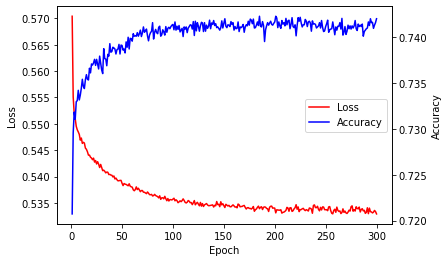

In [391]:
# Visualize Loss/Accuracy
import matplotlib.pyplot as plt
history_df = pd.DataFrame(fit_model.history,
                          index=range(1, len(fit_model.history["loss"]) + 1))

fig, ax = plt.subplots()
loss = ax.plot(history_df["loss"], color="red", label="Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax2 = ax.twinx()
acc = ax2.plot(history_df["accuracy"], color="blue", label="Accuracy")
ax2.set_ylabel("Accuracy")

curves = loss + acc
labs = [l.get_label() for l in curves]
ax.legend(curves, labs, loc="center right")

plt.show()